In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\ali\Documents\py-env\Twitter\Tweets.csv')

In [3]:
df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [4]:
df = df[['text', 'sentiment']]

In [5]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [6]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(27480, 2)

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


,text,sentiment
count,27480,27480
unique,27480,3
top,"I`d have responded, if I were going",neutral
freq,1,11117


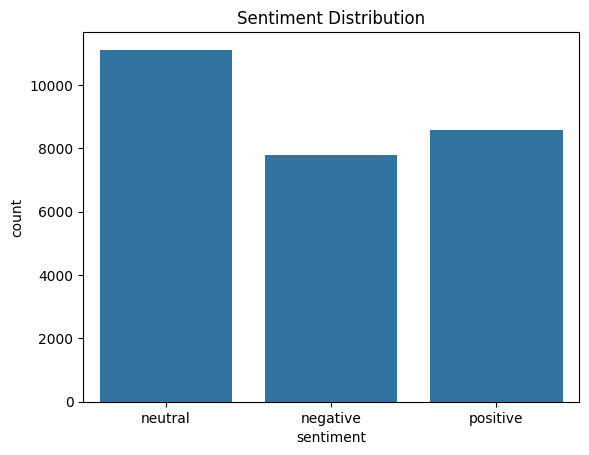

In [10]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

C:\Users\ali\AppData\Local\Temp\ipykernel_2552\770664588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['text'].apply(len)


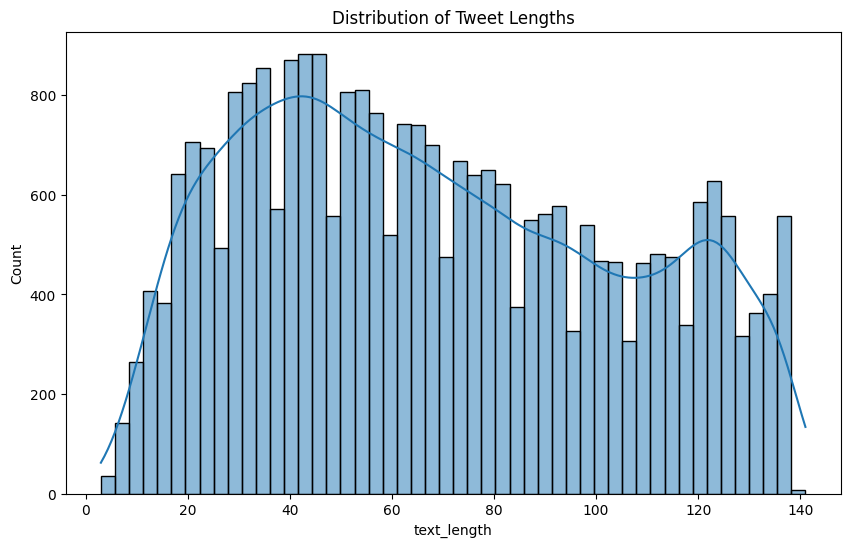

In [11]:
# Add a column for text length
df['text_length'] = df['text'].apply(len)

# Histogram of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.show()

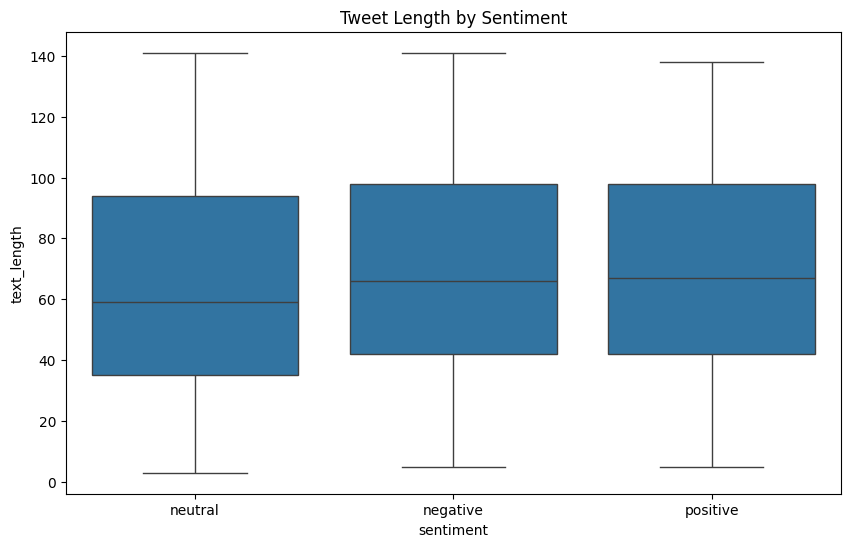

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.show()

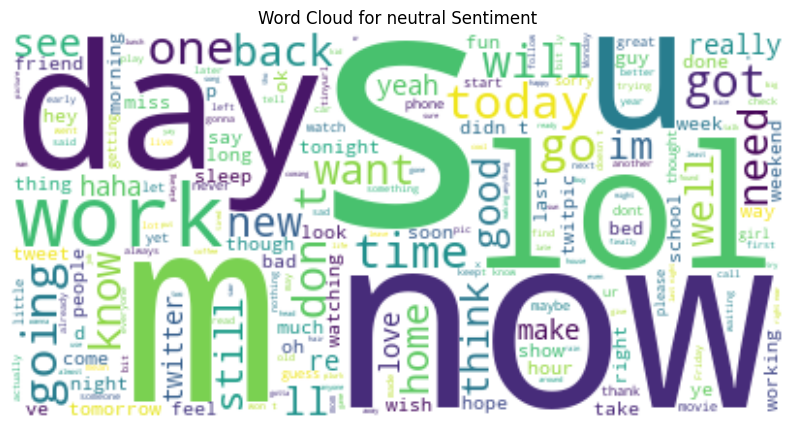

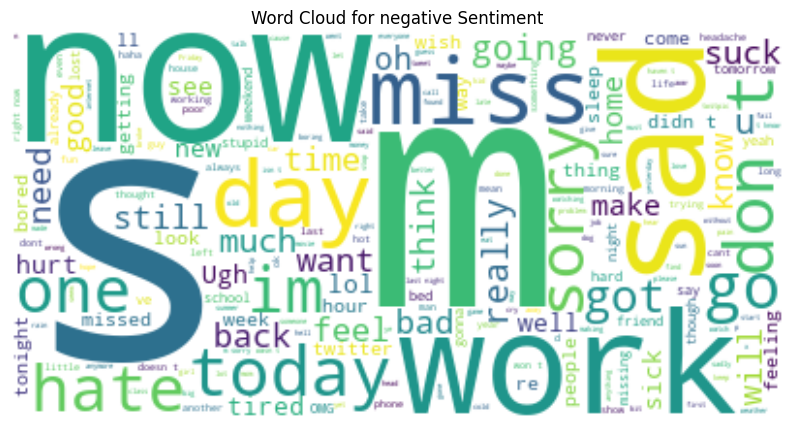

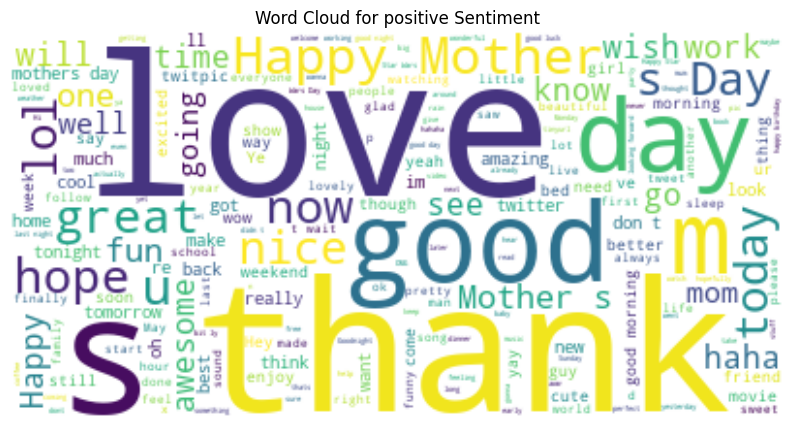

In [13]:
from wordcloud import WordCloud

# Generate word clouds for each sentiment
for sentiment in df['sentiment'].unique():
    text = " ".join(review for review in df[df['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(background_color="white").generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from collections import Counter
import re


# Function to preprocess text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return text

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

C:\Users\ali\AppData\Local\Temp\ipykernel_2552\3554382099.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(preprocess_text)


In [15]:
df

,text,sentiment,text_length,cleaned_text
0,"I`d have responded, if I were going",neutral,36,"[responded, going]"
1,Sooo SAD I will miss you here in San Diego!!!,negative,46,"[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,negative,25,"[boss, bullying]"
3,what interview! leave me alone,negative,31,"[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...",negative,75,"[sons, put, releases, already, bought]"
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,77,"[wish, could, come, see, u, denver, husband, l..."
27477,I`ve wondered about rake to. The client has ...,negative,122,"[wondered, rake, client, made, clear, net, for..."
27478,Yay good for both of you. Enjoy the break - y...,positive,111,"[yay, good, enjoy, break, probably, need, hect..."
27479,But it was worth it ****.,positive,27,[worth]


In [16]:
df = df[['cleaned_text', 'sentiment']]

In [17]:
df

,cleaned_text,sentiment
0,"[responded, going]",neutral
1,"[sooo, sad, miss, san, diego]",negative
2,"[boss, bullying]",negative
3,"[interview, leave, alone]",negative
4,"[sons, put, releases, already, bought]",negative
...,...,...
27476,"[wish, could, come, see, u, denver, husband, l...",negative
27477,"[wondered, rake, client, made, clear, net, for...",negative
27478,"[yay, good, enjoy, break, probably, need, hect...",positive
27479,[worth],positive


In [18]:
# Convert the sentiment labels to numerical format if not already done
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'neutral' else -1))



In [19]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

C:\Users\ali\AppData\Local\Temp\ipykernel_2552\4200543530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [20]:
df

,cleaned_text,sentiment
0,responded going,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons put releases already bought,negative
...,...,...
27476,wish could come see u denver husband lost job ...,negative
27477,wondered rake client made clear net force devs...,negative
27478,yay good enjoy break probably need hectic week...,positive
27479,worth,positive


In [21]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.svm import SVC

# Initialize the SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)



SVC()

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the sentiment labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 68.56%
              precision    recall  f1-score   support

          -1       0.78      0.50      0.61      1572
           0       0.60      0.83      0.70      2236
           1       0.81      0.67      0.73      1688

    accuracy                           0.69      5496
   macro avg       0.73      0.67      0.68      5496
weighted avg       0.71      0.69      0.68      5496

[[ 792  708   72]
 [ 189 1849  198]
 [  39  522 1127]]


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100]}

# Initialize the Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)


c:\Users\ali\Documents\py-env\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ali\Documents\py-env\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

{'C': 1}
0.6796303439581499
